# **Titanic Dataset Analysis using Python**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Loading the dataset

In [2]:
train_df = pd.read_csv("train (1).csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


>Data Cleaning & Preprocessing 

In [3]:
train_df.shape

(891, 12)

In [4]:
# Datatype information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Statistical info
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Checking missing value

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Handle missing values:

In [8]:
#Fill Age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)   #Use .median() because it show the Middle value when the values are sorted, Use-> Numeric data column
                                                                 #Use .mean() because it show the Average value, Use-> Numeric data column
                                                                 #Use .mode() because it show the Most repeated values ih the column, Use-> Categorical or numerical data.                                              
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Drop the Cabin & Ticket & Name column

train_df.drop(columns=["PassengerId","Cabin","Ticket","Name"], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
#Fill Embarked with mode

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)   ##Use .mode()[0] where we use [0] to Pick the first one
train_df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
# ckecking Duplicate values

train_df.duplicated().sum()

np.int64(116)

In [12]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
train_df['Sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

In [14]:
#Converting categorical data into numerical
train_df["Sex"] = train_df["Sex"].map({'male':1,'female':0})
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [15]:
train_df['Sex'].value_counts()  

Sex
1    577
0    314
Name: count, dtype: int64

In [16]:
train_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [18]:
##LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df['Embarked'] = le.fit_transform(train_df['Embarked'])

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [19]:
# Renaming columns for better readability

train_df.rename(columns={"Pclass":"PassengerClass"}, inplace=True)
train_df.head()


,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


>Feature Engineering(Improve model performance)

In [20]:
# Creating a new column of FamilySize

train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

train_df.head(10)


,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,1
5,0,3,1,28.0,0,0,8.4583,1,1
6,0,1,1,54.0,0,0,51.8625,2,1
7,0,3,1,2.0,3,1,21.0750,2,5
8,1,3,0,27.0,0,2,11.1333,2,3
9,1,2,0,14.0,1,0,30.0708,0,2


In [21]:
train_df['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [22]:
##Scaling 
#Convert continuous numerical data into 0 or 1 using Standard Scaler


from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age','Fare','SibSp','Parch','Embarked']

scaler = StandardScaler()

train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])


train_df.head()

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,-0.565736,0.432793,-0.473674,-0.502445,0.585954,2
1,1,1,0,0.663861,0.432793,-0.473674,0.786845,-1.942303,2
2,1,3,0,-0.258337,-0.474545,-0.473674,-0.488854,0.585954,1
3,1,1,0,0.433312,0.432793,-0.473674,0.420730,0.585954,2
4,0,3,1,0.433312,-0.474545,-0.473674,-0.486337,0.585954,1


>EDA

* **Survival rate**

In [23]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

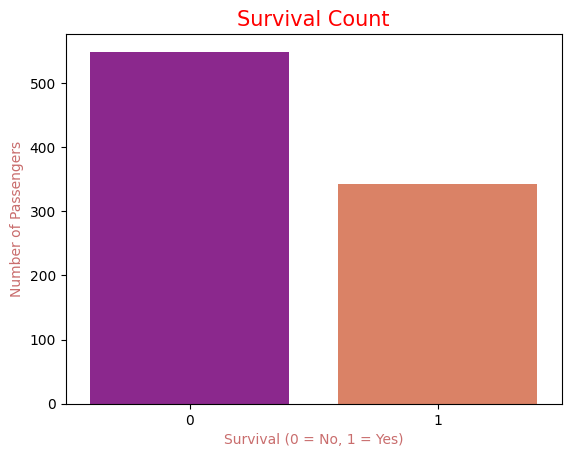

In [24]:
sns.countplot(x='Survived',data=train_df, palette='plasma')
plt.title("Survival Count", c='r',size=15)
plt.xlabel('Survival (0 = No, 1 = Yes)',c="#c96d6d")
plt.ylabel('Number of Passengers',c="#c96d6d")
plt.show()

# Conclusion - According to the above plot, the number of passengers who did **not survive** (label 0) is significantly higher than those who *survived* (label 1). This indicates that the majority of passengers on the Titanic did not survive the tragedy.

* **Which type of gender are more on the Titanic, male(1) or female(0)**

In [25]:
train_df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

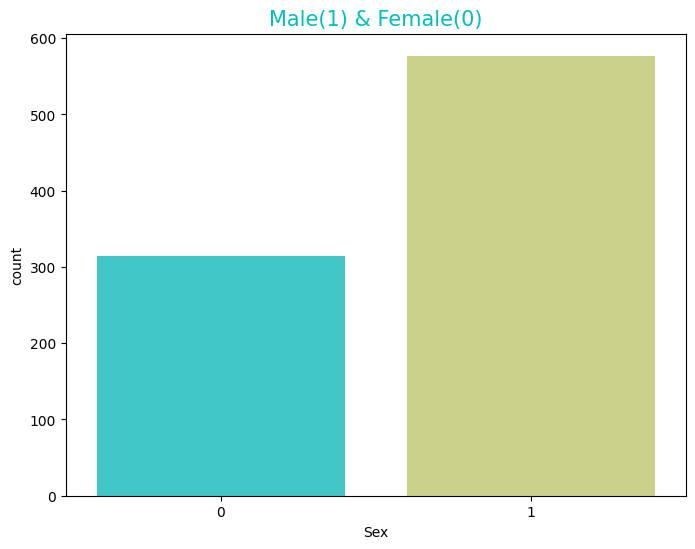

In [26]:
# which type of gender are more, male(1) or female(0)
plt.figure(figsize=(8,6))
sns.countplot(x="Sex", data=train_df, palette="rainbow")

plt.title("Male(1) & Female(0)", c='c', size=15)
plt.show()

# Conclusion - **Male**(label 1) are more on the Titanic than female 

* **Analysis PassengerClass**

In [27]:
train_df['PassengerClass'].value_counts()

PassengerClass
3    491
1    216
2    184
Name: count, dtype: int64

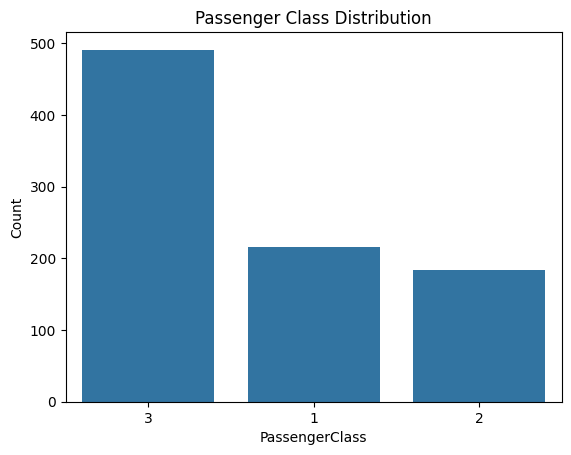

In [28]:
sns.countplot(x='PassengerClass',data=train_df, order=train_df['PassengerClass'].value_counts().index)
plt.title('Passenger Class Distribution')
plt.xlabel('PassengerClass')
plt.ylabel('Count')
plt.show()

In [29]:
train_df.head()

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,-0.565736,0.432793,-0.473674,-0.502445,0.585954,2
1,1,1,0,0.663861,0.432793,-0.473674,0.786845,-1.942303,2
2,1,3,0,-0.258337,-0.474545,-0.473674,-0.488854,0.585954,1
3,1,1,0,0.433312,0.432793,-0.473674,0.420730,0.585954,2
4,0,3,1,0.433312,-0.474545,-0.473674,-0.486337,0.585954,1


* **Age analysis**

In [30]:
train_df['Age'].describe()

count    8.910000e+02
mean     2.272780e-16
std      1.000562e+00
min     -2.224156e+00
25%     -5.657365e-01
50%     -1.046374e-01
75%      4.333115e-01
max      3.891554e+00
Name: Age, dtype: float64

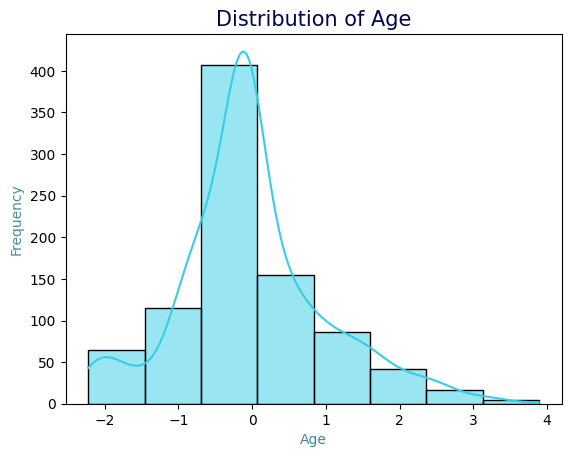

In [31]:
sns.histplot(train_df['Age'], bins=8, kde=True, color="#37CDE7", edgecolor='black')  

plt.title("Distribution of Age", color="#01074D",size=15)
plt.xlabel("Age", color="#418793")
plt.ylabel("Frequency", color="#4A8E9A")

plt.show()

In [32]:
train_df[train_df['Age'] > .90]

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
6,0,1,1,1.893459,-0.474545,-0.473674,0.395814,0.585954,1
11,1,1,0,2.200858,-0.474545,-0.473674,-0.113846,0.585954,1
15,1,2,0,1.970308,-0.474545,-0.473674,-0.326267,0.585954,1
33,0,2,1,2.815657,-0.474545,-0.473674,-0.437007,0.585954,1
35,0,1,1,0.971260,0.432793,-0.473674,0.398582,0.585954,2
...,...,...,...,...,...,...,...,...,...
862,1,1,0,1.432359,-0.474545,-0.473674,-0.126345,0.585954,1
865,1,2,0,0.971260,-0.474545,-0.473674,-0.386671,0.585954,1
871,1,1,0,1.355510,0.432793,0.767630,0.409741,0.585954,3
873,0,3,1,1.355510,-0.474545,-0.473674,-0.467209,0.585954,1


* **Checking the Correlation**

In [33]:
Corr_Matrix = train_df.corr(numeric_only=True)
Corr_Matrix


,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675,0.016639
PassengerClass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098,0.065997
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262,-0.200988
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754,-0.245619
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230,0.890712
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798,0.783111
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719,0.217138
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000,0.066516
FamilySize,0.016639,0.065997,-0.200988,-0.245619,0.890712,0.783111,0.217138,0.066516,1.000000


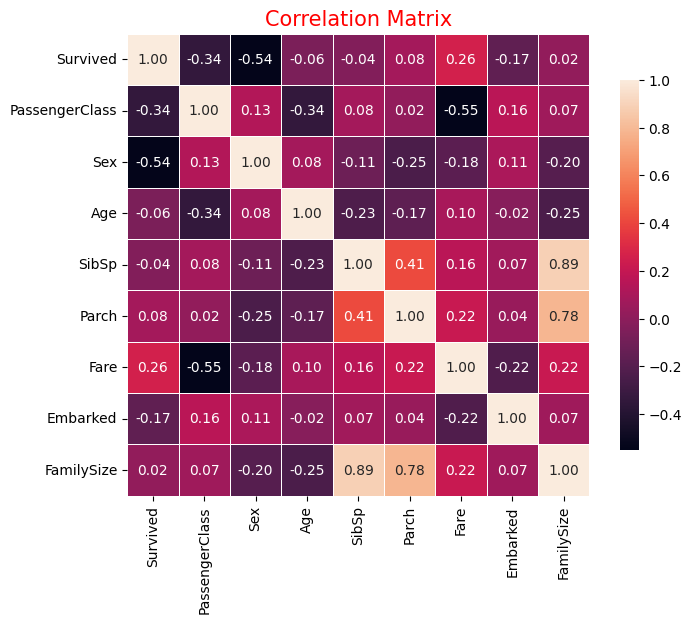

In [34]:
# Plot heatmap
plt.figure(figsize=(8,6))

sns.heatmap(Corr_Matrix, annot=True, fmt=".2f", square=True, linewidths=0.5, cbar_kws={'shrink':0.8})

plt.title("Correlation Matrix", c='r',size=15)
plt.show()

**Q.=> Which type of gender[male(1) or female(0)] has more chances of Survival?** 

In [35]:
# Checking survival chances of male & female

train_df.groupby('Sex')['Survived'].mean()*100

Sex
0    74.203822
1    18.890815
Name: Survived, dtype: float64

In [36]:
sns.set(style="whitegrid")

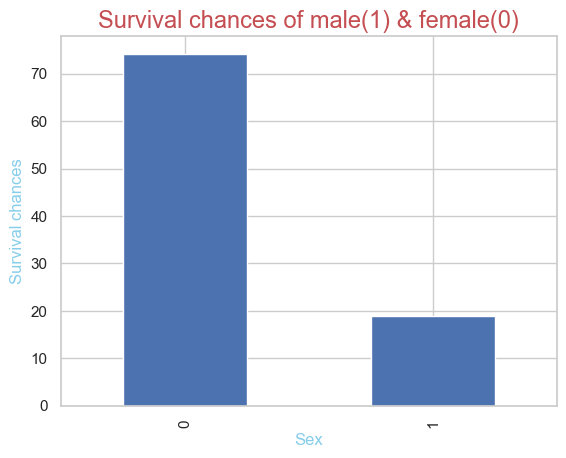

In [37]:
# Checking survival chances of male & female
survival_count = train_df.groupby('Sex')['Survived'].mean()*100

survival_count.plot(kind='bar')

plt.title("Survival chances of male(1) & female(0)", c='r', size=17)
plt.xlabel("Sex", c='skyblue')
plt.ylabel("Survival chances", c='skyblue')
plt.show()

# CONCLUSION - **female(0)** Survival chances are more, than male(1)

**Q.=> Which PassengerClass	has maximum chances to Survive?** 

In [38]:
train_df.groupby('PassengerClass')['Survived'].mean()*100

PassengerClass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

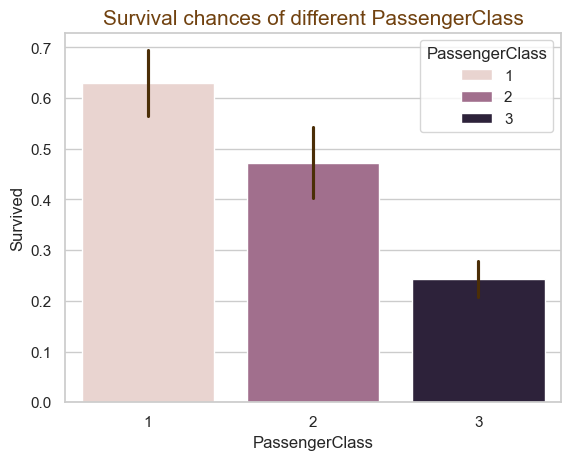

In [39]:
sns.barplot(x='PassengerClass', y='Survived', data=train_df, hue='PassengerClass', errcolor="#4b2e07ff")

plt.title("Survival chances of different PassengerClass", c="#714210", size=15)
plt.show()

# CONCLUSION - **PassengerClass 1** has first maximum Survival chances than PassengerClass 2 has second half Survival chances and than PassengerClass 3 has less Survival chances

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   PassengerClass  891 non-null    int64  
 2   Sex             891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    float64
 5   Parch           891 non-null    float64
 6   Fare            891 non-null    float64
 7   Embarked        891 non-null    float64
 8   FamilySize      891 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 62.8 KB


# **Train_test_split**

In [41]:
from sklearn.model_selection import train_test_split

x = train_df.drop(['Survived'], axis='columns')
y = train_df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=42)  # Hum 80% Data ki Training karte h & 20% Data ki Testing.

x.head()

,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,1,-0.565736,0.432793,-0.473674,-0.502445,0.585954,2
1,1,0,0.663861,0.432793,-0.473674,0.786845,-1.942303,2
2,3,0,-0.258337,-0.474545,-0.473674,-0.488854,0.585954,1
3,1,0,0.433312,0.432793,-0.473674,0.420730,0.585954,2
4,3,1,0.433312,-0.474545,-0.473674,-0.486337,0.585954,1


In [42]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

>Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
y_pred = model.predict(x_test)
y_pred

array([ 0.12362106,  0.24681387,  0.1438528 ,  0.86647691,  0.72243886,
        0.96268986,  0.65763438,  0.08870009,  0.71384991,  0.93672145,
        0.34867525,  0.03146612,  0.4909599 ,  0.1701863 ,  0.22427839,
        0.97548073,  0.32505832,  0.6576625 ,  0.26644004,  0.34017265,
        0.12510392,  0.39203644,  0.62438462,  0.14431438,  0.10871032,
        0.04149244,  0.43777271,  0.24770153,  0.06960021,  0.60690334,
        0.14852706,  0.64902799,  0.49504455,  0.62084921,  0.15326643,
        0.14807276,  0.42332202,  0.65763438,  1.00038989,  0.10636541,
        0.23856065,  0.06264474,  0.10642016,  0.1430278 ,  0.59704215,
        0.07310405,  0.14862026,  0.1302605 ,  0.12480361,  0.34373029,
        0.70866452,  0.78730884, -0.06167418,  0.45413301, -0.03030341,
        0.96035463,  0.24212924,  0.96352779,  0.74641011,  0.6998419 ,
        0.13911491,  0.82889117,  0.74224357,  0.41992229,  0.1430278 ,
        0.63962014,  0.31602914,  0.1016734 ,  0.17230556,  0.87

In [45]:
from sklearn.metrics import r2_score

# r2 score
r2 = r2_score(y_test, y_pred)
r2

0.4425038317234048

In [46]:
# Adjusted r2 score

n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.4361596363518361

In [47]:
##Use Standard scaling in Model
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled

array([[-1.61413602,  0.7243102 ,  1.25364106, ..., -0.07868358,
         0.5635246 , -0.55466613],
       [-0.40055118,  0.7243102 , -0.47728355, ..., -0.37714494,
         0.5635246 , -0.55466613],
       [ 0.81303367,  0.7243102 ,  0.21508629, ..., -0.47486697,
         0.5635246 , -0.55466613],
       ...,
       [ 0.81303367,  0.7243102 ,  0.90745614, ..., -0.35580399,
         0.5635246 ,  0.63485883],
       [-1.61413602, -1.38062393, -1.1696534 , ...,  1.68320121,
         0.5635246 ,  1.22962131],
       [-1.61413602,  0.7243102 , -0.63114352, ...,  0.86074761,
         0.5635246 ,  0.04009635]], shape=(712, 8))

# Classification Algorithm

>1. Logistric Regression

In [48]:
#LogistricRegresion

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [49]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [50]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [51]:
##Confusion Matrix       ## Logistic Regresion me 'Confusion Matrix' ke through hi Model ki performance check karte h And Linear Regression me R2 ya Adjusted r2 se

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
accuracy_score(y_test, y_pred)

0.8100558659217877

In [53]:
confusion_matrix(y_test, y_pred)

array([[90, 15],
       [19, 55]])

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [55]:
x_test_scaled

array([[ 0.81303367,  0.7243102 , -0.09263364, ..., -0.33390078,
        -2.02505292,  0.63485883],
       [-0.40055118,  0.7243102 ,  0.13815631, ..., -0.42528387,
         0.5635246 , -0.55466613],
       [ 0.81303367,  0.7243102 , -0.7080735 , ..., -0.47486697,
         0.5635246 , -0.55466613],
       ...,
       [ 0.81303367, -1.38062393,  0.67666619, ..., -0.02308312,
         0.5635246 ,  3.01390875],
       [-0.40055118, -1.38062393, -0.93886345, ..., -0.42528387,
         0.5635246 , -0.55466613],
       [ 0.81303367, -1.38062393, -1.93895323, ..., -0.30589933,
         0.5635246 ,  0.63485883]], shape=(179, 8))

>2. K-Nearst Neighbars

In [56]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(x_train_scaled,y_train)      # Model train ho gya

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
y_pred_knn = model_knn.predict(x_test_scaled)
y_pred_knn

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [58]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [59]:
accuracy_score(y_test, y_pred_knn)

0.8212290502793296

In [60]:
confusion_matrix(y_test, y_pred_knn)

array([[92, 13],
       [19, 55]])

In [61]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Conclusion - So Now When we compare for this dataset 'Logistic regression' b/w 'K-Nearst Neighbar' then -> Logistic regression is now Performing better

>3. Naive bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(x_train,y_train)        # Model trained

,priors,None
,var_smoothing,1e-09


In [63]:
y_pred_NB = model_NB.predict(x_test)
y_pred_NB

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [64]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [65]:
accuracy_score(y_test, y_pred_NB)

0.7821229050279329

In [66]:
confusion_matrix(y_test, y_pred_NB)

array([[83, 22],
       [17, 57]])

In [67]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



>4. Decision Trees

In [68]:
from sklearn.tree import DecisionTreeClassifier

model_Dt = DecisionTreeClassifier(random_state=42)
model_Dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [69]:
y_pred_DT = model_Dt.predict(x_test)
y_pred_DT

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1])

In [70]:
accuracy_score(y_test, y_pred_DT)

0.7821229050279329

In [71]:
confusion_matrix(y_test, y_pred_DT)

array([[83, 22],
       [17, 57]])

In [72]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



>5. Support vector machine (SVM)

In [73]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf')
model_svm.fit(x_train_scaled,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [74]:
y_pred_svm = model_svm.predict(x_test_scaled)
y_pred_DT

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1])

In [75]:
accuracy_score(y_test, y_pred_svm)

0.8156424581005587

In [76]:
confusion_matrix(y_test, y_pred_svm)

array([[92, 13],
       [20, 54]])

In [77]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



# Conclusion - Now for this prediction **K-Nearst Neighbars (KNN)** is performing better

In [78]:
train_df.head()

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,-0.565736,0.432793,-0.473674,-0.502445,0.585954,2
1,1,1,0,0.663861,0.432793,-0.473674,0.786845,-1.942303,2
2,1,3,0,-0.258337,-0.474545,-0.473674,-0.488854,0.585954,1
3,1,1,0,0.433312,0.432793,-0.473674,0.420730,0.585954,2
4,0,3,1,0.433312,-0.474545,-0.473674,-0.486337,0.585954,1


In [79]:
#Check the index 889 are Survived or not
result2 = model.predict([[1, 1, -0.258337, -0.474545, -0.473674, -0.044381, -1.942303, 1]])
print("Survived" if result2[0]== 1 else "Did not survive")

Survived


In [80]:
import pickle

pickle.dump(model_knn, open("KNN_servival.pkl","wb"))
pickle.dump(scaler, open("scaler.pkl","wb"))